<a href="https://colab.research.google.com/github/Lizqxel/dsx2025/blob/main/miura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 必要なライブラリ
import os
import requests
import zipfile
import pandas as pd

# tqdm は進捗バー、必要なら以下でインストール
# !pip install tqdm
from tqdm import tqdm

# 保存先フォルダ（Drive 上）
dataset_dir = "/content/drive/MyDrive/datasciense00/datasets"
os.makedirs(dataset_dir, exist_ok=True)

# ベースURL（0000.zipのみ使用）
base_url = "https://dlsv.dsc.nii.ac.jp/idr/b1023027@fun.ac.jp/83d587ac5f24b4c2/nicocomm/data.20211222/comment"
zip_name = "0000.zip"
url = f"{base_url}/{zip_name}"
zip_path = os.path.join(dataset_dir, zip_name)

# ダウンロード
if not os.path.exists(zip_path):
    print(f"Downloading {zip_name}...")
    response = requests.get(url)
    if response.status_code == 200:
        with open(zip_path, "wb") as f:
            f.write(response.content)
    else:
        print(f"Failed to download {zip_name}: Status code {response.status_code}")
else:
    print(f"{zip_name} already downloaded.")

# 展開
extract_path = os.path.join(dataset_dir, zip_name.replace(".zip", ""))
if not os.path.exists(extract_path):
    print(f"Extracting {zip_name}...")
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
else:
    print(f"{zip_name} already extracted.")

# ファイル一覧からCSVまたはTSVファイルを1つ読み込み
csv_files = [f for f in os.listdir(extract_path) if f.endswith(".csv") or f.endswith(".tsv")]
if csv_files:
    first_file = os.path.join(extract_path, csv_files[0])
    df = pd.read_csv(first_file, sep='\t' if first_file.endswith(".tsv") else ',')
    print("✅ カラム名一覧:")
    print(df.columns)
else:
    print("CSVまたはTSVファイルが見つかりませんでした。")

0000.zip already downloaded.
0000.zip already extracted.
CSVまたはTSVファイルが見つかりませんでした。


In [ ]:
import os
import json

# 明示的に探索先フォルダを指定（Drive 上の展開済みフォルダ）
extract_path = "/content/drive/MyDrive/datasciense00/datasets/0000/0000"

# jsonlファイルを探す
jsonl_files = [f for f in os.listdir(extract_path) if f.endswith(".jsonl")]
if jsonl_files:
    first_jsonl = os.path.join(extract_path, jsonl_files[0])
    print(f"✅ 読み込むファイル: {first_jsonl}")

    # 最初の数行を読み込んで中身確認
    with open(first_jsonl, 'r', encoding='utf-8') as f:
        for i in range(5):  # 最初の5行を表示
            line = f.readline()
            if not line:
                break
            data = json.loads(line)
            print(f"\n🔹 {i+1}行目のデータ:")
            print(data)
            print("キー一覧:", list(data.keys()))
else:
    print("❌ jsonlファイルが見つかりませんでした。")

In [ ]:
import glob

base_path = "/content/drive/MyDrive/datasciense00/datasets/0000/0000/"  # フォルダ階層は環境に応じて修正してください

monthly_counts = Counter()

# 複数jsonlファイルを読み込み
for filepath in glob.glob(base_path + "*.jsonl"):
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            if 'date' in data:
                try:
                    dt = datetime.fromisoformat(data['date'])
                    month_str = dt.strftime('%Y-%m')
                    monthly_counts[month_str] += 1
                except Exception as e:
                    pass

# 結果表示
for month, count in sorted(monthly_counts.items()):
    print(f"{month}: {count}件")


2007-03: 397件
2007-04: 2575件
2007-05: 6827件
2007-06: 5843件
2007-07: 25744件
2007-08: 22839件
2007-09: 18232件
2007-10: 22439件
2007-11: 25175件
2007-12: 78038件
2008-01: 38011件
2008-02: 76462件
2008-03: 65738件
2008-04: 35585件
2008-05: 73588件
2008-06: 51090件
2008-07: 57663件
2008-08: 57764件
2008-09: 46654件
2008-10: 41661件
2008-11: 36856件
2008-12: 29995件
2009-01: 29727件
2009-02: 159783件
2009-03: 37218件
2009-04: 28777件
2009-05: 29674件
2009-06: 26153件
2009-07: 35861件
2009-08: 26147件
2009-09: 20976件
2009-10: 30158件
2009-11: 43016件
2009-12: 29879件
2010-01: 55531件
2010-02: 34127件
2010-03: 33728件
2010-04: 29487件
2010-05: 30201件
2010-06: 47719件
2010-07: 38639件
2010-08: 48601件
2010-09: 31140件
2010-10: 29767件
2010-11: 43674件
2010-12: 32504件
2011-01: 31686件
2011-02: 51824件
2011-03: 29003件
2011-04: 25625件
2011-05: 26548件
2011-06: 70024件
2011-07: 49334件
2011-08: 37771件
2011-09: 50417件
2011-10: 35597件
2011-11: 23982件
2011-12: 23597件
2012-01: 36432件
2012-02: 25027件
2012-03: 30175件
2012-04: 23965件
2012-05: 320

<ipython-input-14-3048067518>:15: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-3048067518>:15: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-3048067518>:15: UserWarning: Glyph 12467 (\N{KATAKANA LETTER KO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-3048067518>:15: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-3048067518>:15: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-3048067518>:15: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-3048067518>:15: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipy

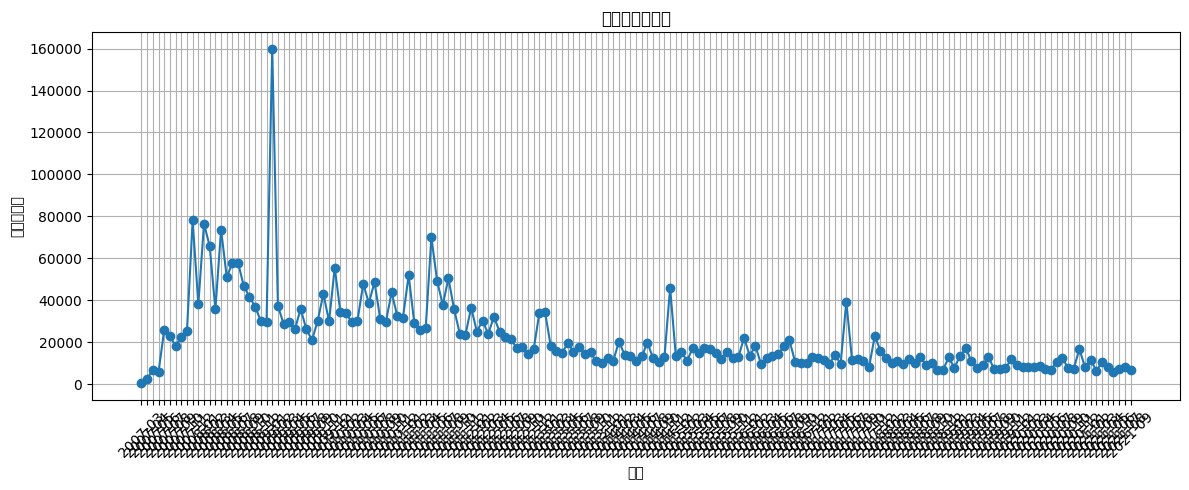

In [ ]:
import matplotlib.pyplot as plt

# 日付と件数をリストに（ソート）
months = sorted(monthly_counts.keys())
counts = [monthly_counts[m] for m in months]

# プロット
plt.figure(figsize=(12, 5))
plt.plot(months, counts, marker='o')
plt.xticks(rotation=45)
plt.title("月別コメント数")
plt.xlabel("年月")
plt.ylabel("コメント数")
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
# 🔧 1. Janome のインストール（最初の1回だけ必要）
!pip install janome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 29.6 MB/s eta 0:00:00


In [3]:
# 📚 必要ライブラリ
import os
import glob
import json
import pandas as pd
from datetime import datetime
from collections import defaultdict, Counter
from janome.tokenizer import Tokenizer

# 🔧 初期化
tokenizer = Tokenizer()
stopwords = set(['する', 'ある', 'いる', 'なる', 'こと', 'それ', 'これ', 'さん', 'もの', 'よう', 'ん'])  # 適宜調整
base_path = "/content/drive/MyDrive/datasciense00/datasets/0000/0000/"

monthly_words = defaultdict(Counter)

# 🔄 コメントを月ごとに形態素解析してカウント
for filepath in glob.glob(os.path.join(base_path, "*.jsonl")):
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                data = json.loads(line)
                if 'date' in data and 'comment' in data:
                    dt = datetime.fromisoformat(data['date'])
                    month = dt.strftime('%Y-%m')
                    words = [token.base_form for token in tokenizer.tokenize(data['comment'])]
                    for word in words:
                        if word not in stopwords and len(word) > 1:
                            monthly_words[month][word] += 1
            except:
                continue

# 📄 出力用リスト作成
output_rows = []
for month in sorted(monthly_words.keys()):
    for word, count in monthly_words[month].most_common(5):  # 各月上位30語など制限可
        output_rows.append({
            "年月": month,
            "スラング": word,
            "出現回数": count
        })

# 📤 DataFrame化 & 表示
df = pd.DataFrame(output_rows)
display(df.head())


Empty DataFrame
Columns: []
Index: []

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

In [5]:
print(df)

Empty DataFrame
Columns: []
Index: []
